In [300]:
from requests import get
from bs4 import BeautifulSoup
import os
import re
from env import github_token, github_username
import scraper
import acquire_r
import pandas as pd
import json
import seaborn as sns
import time
import prepare_r

In [2]:
headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

if headers["Authorization"] == "token " or headers["User-Agent"] == "":
    raise Exception(
        "You need to follow the instructions marked TODO in this script before trying to use it"
    )

In [79]:
# List of urls to scrape
g_url = ['https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=forks&type=Repositories', ' https://github.com/search?o=desc&p=2&q=stars%3A%3E1&s=forks&type=Repositories'\
         'https://github.com/search?o=desc&p=3&q=stars%3A%3E1&s=forks&type=Repositories', 'https://github.com/search?o=desc&p=4&q=stars%3A%3E1&s=forks&type=Repositories',\
         'https://github.com/search?o=desc&p=5&q=stars%3A%3E1&s=forks&type=Repositories','https://github.com/search?o=desc&p=6&q=stars%3A%3E1&s=forks&type=Repositories',\
        'https://github.com/search?o=desc&p=7&q=stars%3A%3E1&s=forks&type=Repositories','https://github.com/search?o=desc&p=8&q=stars%3A%3E1&s=forks&type=Repositories',\
        'https://github.com/search?o=desc&p=9&q=stars%3A%3E1&s=forks&type=Repositories','https://github.com/search?o=desc&p=10&q=stars%3A%3E1&s=forks&type=Repositories',\
        'https://github.com/search?o=desc&p=11&q=stars%3A%3E1&s=forks&type=Repositories','https://github.com/search?o=desc&p=12&q=stars%3A%3E1&s=forks&type=Repositories']

In [83]:
def get_repos(urls):
    repo = []
    for url in urls:
        time.sleep(10)
        response = get(url, headers=headers)
        soup = BeautifulSoup(response.text)
        text = soup.find_all(attrs={"f4 text-normal"})
        for i in text:
            repo.append(i.find('a')['href'])
    return repo


In [84]:
repos = get_repos(g_url)

In [91]:
repos

['/jtleek/datasharing',
 '/rdpeng/ProgrammingAssignment2',
 '/octocat/Spoon-Knife',
 '/tensorflow/tensorflow',
 '/SmartThingsCommunity/SmartThingsPublic',
 '/twbs/bootstrap',
 '/github/gitignore',
 '/rdpeng/ExData_Plotting1',
 '/tensorflow/models',
 '/nightscout/cgm-remote-monitor',
 '/facebook/react',
 '/DataScienceSpecialization/courses',
 '/angular/angular.js',
 '/jlord/patchwork',
 '/barryclark/jekyll-now',
 '/Snailclimb/JavaGuide',
 '/firstcontributions/first-contributions',
 '/bitcoin/bitcoin',
 '/spring-projects/spring-framework',
 '/vuejs/vue',
 '/getify/You-Dont-Know-JS',
 '/freeCodeCamp/freeCodeCamp',
 '/kubernetes/kubernetes',
 '/udacity/frontend-nanodegree-resume',
 '/mrdoob/three.js',
 '/TheAlgorithms/Python',
 '/LarryMad/recipes',
 '/ant-design/ant-design',
 '/d3/d3',
 '/apache/spark',
 '/DefinitelyTyped/DefinitelyTyped',
 '/django/django',
 '/apache/dubbo',
 '/996icu/996.ICU',
 '/justjavac/free-programming-books-zh_CN',
 '/ohmyzsh/ohmyzsh',
 '/scikit-learn/scikit-learn',

In [92]:
#repos = scraper.get_repos(g_url)

/Users/ravindersingh/codeup-data-science/nlp_project/git-language/scraper.py:28: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 28 of the file /Users/ravindersingh/codeup-data-science/nlp_project/git-language/scraper.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


In [93]:
f = open('data.json')
json_file = json.load(f)

In [301]:
df = pd.DataFrame(json_file)

In [302]:
df

,repo,language,readme_contents
0,jtleek/datasharing,None,How to share data with a statistician\n=======...
1,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...
2,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
4,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...
...,...,...,...
95,danielmiessler/SecLists,PHP,![seclists.png](https://danielmiessler.com/ima...
96,ytdl-org/youtube-dl,Python,[![Build Status](https://travis-ci.org/ytdl-or...
97,josephmisiti/awesome-machine-learning,Python,# Awesome Machine Learning [![Awesome](https:/...
98,protocolbuffers/protobuf,C++,Protocol Buffers - Google's data interchange f...


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             100 non-null    object
 1   language         86 non-null     object
 2   readme_contents  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [304]:
df.isnull().sum()

repo                0
language           14
readme_contents     0
dtype: int64

In [305]:
df = df.dropna(axis =0)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 1 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             86 non-null     object
 1   language         86 non-null     object
 2   readme_contents  86 non-null     object
dtypes: object(3)
memory usage: 2.7+ KB


In [307]:
df = df.reset_index(drop = True)

In [308]:
df.language.value_counts()

JavaScript          23
Python              14
Java                 9
TypeScript           6
HTML                 5
C++                  4
CSS                  4
C                    4
Go                   3
PHP                  2
Jupyter Notebook     2
C#                   2
Scala                1
Groovy               1
Rust                 1
Dart                 1
Vue                  1
Shell                1
R                    1
Ruby                 1
Name: language, dtype: int64

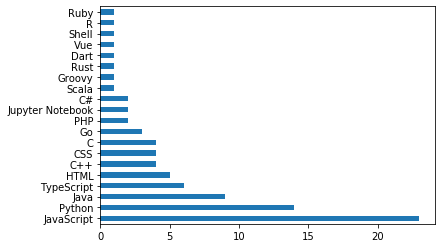

In [309]:
# bar plot showing repo counts by language
df.language.value_counts().plot.barh()

In [310]:
import re
import unicodedata
import pandas as pd
import nltk

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [311]:
df = df.drop(columns = ['repo'])

In [312]:
df1 = df.readme_contents.groupby(df.language).sum()

In [313]:
df1 = pd.DataFrame(df1).reset_index()

In [314]:
df1.head(4)

,language,readme_contents
0,C,[![Build status](https://github.com/git/git/wo...
1,C#,# ASP.NET Core Docs\n\nThis repository contain...
2,C++,"<div align=""center"">\n <img src=""https://www...."
3,CSS,"> March, 2016: If you're on an old version of ..."


In [315]:
df = prepare_r.prep_contents(df)

In [322]:
df = df.drop(columns = ['original', 'normalized', 'stemmed', 'lemmatized'])
df.head(4)

,language,readme_contents,cleaned
0,R,### Introduction\n\nThis second programming as...,introduction second programming assignment req...
1,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...
2,C++,"<div align=""center"">\n <img src=""https://www....",div align center img src tensorflow org image ...
3,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...,smartthings public repo official list smartapp...


In [319]:
df1 = prepare_r.prep_contents(df1)

In [323]:
df1 = df1.drop(columns = ['original', 'normalized', 'stemmed', 'lemmatized'])
df1.head(4)

,language,readme_contents,cleaned
0,C,[![Build status](https://github.com/git/git/wo...,build status com git git workflow badge svg co...
1,C#,# ASP.NET Core Docs\n\nThis repository contain...,asp net core doc repository contains conceptua...
2,C++,"<div align=""center"">\n <img src=""https://www....",div align center img src tensorflow org image ...
3,CSS,"> March, 2016: If you're on an old version of ...",march old version jekyll run build warning syn...
